<a href="https://colab.research.google.com/github/josetaco/Salud-y-seguros-Modelo-param-trico-/blob/main/Metodolog%C3%ADa_CRISP_DM(Seguros)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cargamos las librerias
import pandas as pd
import numpy as np
import statistics as stats # estadística
# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Preprocesado y modelado
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.weightstats import ttest_ind # prueba de medias

# Configuración matplotlib

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

#Graficar
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


# Tratamiento de datos

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_blobs

# Gráficos

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#cargamos la data desde nuestra PC
from google.colab import files
files.upload()

Saving Seguros.csv to Seguros.csv


{'Seguros.csv': b'Cliente_ID,Antig\xfcedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro\r\n185,44,1,604.86,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n238,79,1,1006.21,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n346,102,1,299.23,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n460,,1,645.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n549,109,,218,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n559,183,,10.32,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n666,172,0,3517.07,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n676,76,1,216.52,0,0,1,0,0,0,0,0,0,0,1,1,1,no\r\n696,136,0,1908.69,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n907,171,0,1895.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n974,93,1,1310.43,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1083,119,1,5085.55,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1186,9,,4871.7,0,0,0,0,0,1,0,0,0,0,0,0,0,no\r\n1196,17,1,193.4,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1454,122,1,83.34

In [ ]:
#levantamos la data con pandas
data_Seguros = pd.read_csv('Seguros.csv',encoding= 'unicode_escape')
data_Seguros.tail(10)

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
5790,786534,1.0,0.0,141.21,0,NaN,NaN,NaN,NaN,NaN,0.00,0,0,0,0,0,0,NaN
5791,788050,NaN,1.0,8618.68,4,3.0,3.0,2.0,1.0,1.0,0.00,11,7,7,3,2,2,NaN
5792,788544,5.0,3.0,15146.47,0,0.0,0.0,0.0,0.0,NaN,123329.24,0,0,0,0,0,0,NaN
5793,789246,2.0,0.0,2090.80,0,0.0,NaN,NaN,NaN,NaN,0.00,2,2,2,0,0,0,NaN
5794,789498,5.0,0.0,931.50,0,0.0,0.0,0.0,0.0,NaN,0.00,0,0,0,0,0,0,NaN
5795,789697,13.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,NaN
5796,789964,2.0,0.0,2196.94,0,0.0,NaN,NaN,NaN,NaN,0.00,0,0,0,0,0,0,NaN
5797,790092,4.0,2.0,805.72,0,0.0,0.0,0.0,NaN,NaN,0.00,0,0,0,0,0,0,NaN
5798,790346,0.0,NaN,0.01,0,NaN,NaN,NaN,NaN,NaN,0.00,0,0,0,0,0,0,NaN
5799,790551,4.0,0.0,1261.59,0,0.0,0.0,0.0,NaN,NaN,0.00,0,0,0,0,0,0,NaN


## Comprension del Negocio

Probabilidad de que un cliente falle(sea siniestroso) y nos recupere el credito otrogado por alguna institución

## Comprension de los Datos

In [ ]:
data_Seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5213 non-null   float64
 2   Nivel_Ingresos       5527 non-null   float64
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Puntaje_Morosidad2   5614 non-null   float64
 6   Puntaje_Morosidad3   5544 non-null   float64
 7   Puntaje_Morosidad4   5460 non-null   float64
 8   Puntaje_Morosidad5   5397 non-null   float64
 9   Puntaje_Morosidad6   5324 non-null   float64
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

Hay variables que tienen la presencia de datos nulos, por lo que tenmos que aplicar algun metodo de imputacion o tomar alguna decision del futuro de la varaible

Seleccionamos las variables que entraran en el modelo

In [ ]:
Siniestros=data_Seguros['Siniestros1']+data_Seguros['Siniestros2']+data_Seguros['Siniestros3']+data_Seguros['Siniestros4']+data_Seguros['Siniestros5']+data_Seguros['Siniestros6']
data_Seguros = data_Seguros.loc[:, ['Cliente_ID', 'Antigüedad_Maxima', 'Nivel_Ingresos', 'Saldo_Pendiente', 'Puntaje_Morosidad1','Saldo_Pendiente_Seg','Estado_Siniestro']]
data_Seguros.head(6)


,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Saldo_Pendiente_Seg,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,no
1,238,79.0,1.0,1006.21,0,0.0,no
2,346,102.0,1.0,299.23,0,0.0,no
3,460,NaN,1.0,645.19,0,0.0,no
4,549,109.0,NaN,218.00,0,0.0,no
5,559,183.0,NaN,10.32,0,0.0,no


In [ ]:
data_Seguros=data_Seguros.assign(Siniestros=Siniestros)
data_Seguros.tail(10)

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Saldo_Pendiente_Seg,Estado_Siniestro,Siniestros
5790,786534,1.0,0.0,141.21,0,0.00,NaN,0
5791,788050,NaN,1.0,8618.68,4,0.00,NaN,32
5792,788544,5.0,3.0,15146.47,0,123329.24,NaN,0
5793,789246,2.0,0.0,2090.80,0,0.00,NaN,6
5794,789498,5.0,0.0,931.50,0,0.00,NaN,0
5795,789697,13.0,0.0,0.00,0,0.00,NaN,0
5796,789964,2.0,0.0,2196.94,0,0.00,NaN,0
5797,790092,4.0,2.0,805.72,0,0.00,NaN,0
5798,790346,0.0,NaN,0.01,0,0.00,NaN,0
5799,790551,4.0,0.0,1261.59,0,0.00,NaN,0


In [ ]:
data_Seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5213 non-null   float64
 2   Nivel_Ingresos       5527 non-null   float64
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Saldo_Pendiente_Seg  5800 non-null   float64
 6   Estado_Siniestro     4732 non-null   object 
 7   Siniestros           5800 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 362.6+ KB


## Preparacion de Datos

In [ ]:
data_Seguros['Estado_Siniestro']=np.where(data_Seguros['Siniestros']>0,1,0)
data_Seguros.tail(10)

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Saldo_Pendiente_Seg,Estado_Siniestro,Siniestros
5790,786534,1.0,0.0,141.21,0,0.00,0,0
5791,788050,NaN,1.0,8618.68,4,0.00,1,32
5792,788544,5.0,3.0,15146.47,0,123329.24,0,0
5793,789246,2.0,0.0,2090.80,0,0.00,1,6
5794,789498,5.0,0.0,931.50,0,0.00,0,0
5795,789697,13.0,0.0,0.00,0,0.00,0,0
5796,789964,2.0,0.0,2196.94,0,0.00,0,0
5797,790092,4.0,2.0,805.72,0,0.00,0,0
5798,790346,0.0,NaN,0.01,0,0.00,0,0
5799,790551,4.0,0.0,1261.59,0,0.00,0,0


In [ ]:
data_Seguros.isnull().sum()

Cliente_ID               0
Antigüedad_Maxima      587
Nivel_Ingresos         273
Saldo_Pendiente          0
Puntaje_Morosidad1       0
Saldo_Pendiente_Seg      0
Estado_Siniestro         0
Siniestros               0
dtype: int64

# Imputacion

In [ ]:
simple = SimpleImputer(strategy='median')
data_seguros_imp = simple.fit_transform(data_Seguros)
data_Seguros = pd.DataFrame(
    data=data_seguros_imp,
    columns=['Cliente_ID','Antigüedad_Maxima','Nivel_Ingresos','Saldo_Pendiente','Puntaje_Morosidad1','Saldo_Pendiente_Seg','Estado_Siniestro','Siniestros'])

data_Seguros.isnull().sum()

Cliente_ID             0
Antigüedad_Maxima      0
Nivel_Ingresos         0
Saldo_Pendiente        0
Puntaje_Morosidad1     0
Saldo_Pendiente_Seg    0
Estado_Siniestro       0
Siniestros             0
dtype: int64

In [ ]:
#Dividimos las varaibles en cualitativas y cauntitativas
#Variables cualitativo
data_Seguros_cualita = data_Seguros.loc[:, ['Nivel_Ingresos', 'Puntaje_Morosidad1']]

#Variables cuantitativa
data_Seguros_cuantita = data_Seguros.loc[:, ['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg','Estado_Siniestro','Siniestros']]


In [ ]:
#Convirtiendo a strng
data_Seguros_cat = data_Seguros_cualita.astype(str)
data_Seguros_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nivel_Ingresos      5800 non-null   object
 1   Puntaje_Morosidad1  5800 non-null   object
dtypes: object(2)
memory usage: 90.8+ KB


In [ ]:
#Unimos los Data Frames
data_Seguros_final= pd.merge(data_Seguros_cuantita, data_Seguros_cat, left_index=True, right_index=True)
data_Seguros_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    5800 non-null   float64
 1   Saldo_Pendiente      5800 non-null   float64
 2   Saldo_Pendiente_Seg  5800 non-null   float64
 3   Estado_Siniestro     5800 non-null   float64
 4   Siniestros           5800 non-null   float64
 5   Nivel_Ingresos       5800 non-null   object 
 6   Puntaje_Morosidad1   5800 non-null   object 
dtypes: float64(5), object(2)
memory usage: 317.3+ KB


Todas las variables tiene sus datos completos

In [ ]:
data_Seguros_final.describe()


,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Estado_Siniestro,Siniestros
count,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000
mean,48.243276,3240.983681,4970.516469,0.253276,3.770172
std,44.861054,6157.722805,22016.410538,0.434925,27.388516
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,329.747500,0.000000,0.000000,0.000000
50%,34.000000,1100.315000,0.000000,0.000000,0.000000
75%,68.000000,3265.322500,0.000000,1.000000,1.000000
max,255.000000,124102.080000,442334.800000,1.000000,1733.000000


Interpretación: Como podemos observar la media de la antiguedad maxima de los asegurados es 49 meses aprox. donde el minimo es de 0 y maximo de 255 meses. El promedio del saldo pendiente es menor al saldo pendiente de la poliza de seguros. La cantidad maxima de siniestros es de 1733 y eminimo de 0, cuyo promedio es de 3.77.


# Transformamos las variables cualitativas en variables dummy

In [ ]:
t_Nivel_Ingreso = pd.get_dummies(data_Seguros_final.Nivel_Ingresos, prefix='Nivel_Ingresos')
print(t_Nivel_Ingreso.head())

   Nivel_Ingresos_0.0  Nivel_Ingresos_1.0  Nivel_Ingresos_2.0  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   0                   1                   0   

   Nivel_Ingresos_3.0  Nivel_Ingresos_4.0  Nivel_Ingresos_5.0  
0                   0                   0                   0  
1                   0                   0                   0  
2                   0                   0                   0  
3                   0                   0                   0  
4                   0                   0                   0  


In [ ]:
t_Puntaje_Morosidad1 = pd.get_dummies(data_Seguros_final.Puntaje_Morosidad1, prefix='Puntaje_Morosidad1')
print(t_Puntaje_Morosidad1.head())

   Puntaje_Morosidad1_0.0  Puntaje_Morosidad1_1.0  Puntaje_Morosidad1_2.0  \
0                       1                       0                       0   
1                       1                       0                       0   
2                       1                       0                       0   
3                       1                       0                       0   
4                       1                       0                       0   

   Puntaje_Morosidad1_3.0  Puntaje_Morosidad1_4.0  Puntaje_Morosidad1_5.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Puntaje_Morosidad1_6.0  
0                       0  
1                 

In [ ]:
data_Seguros_finalD = pd.merge(data_Seguros_cuantita, t_Nivel_Ingreso, left_index=True, right_index=True)
data_Seguros_finalD = pd.merge(data_Seguros_finalD, t_Puntaje_Morosidad1,  left_index=True, right_index=True)
data_Seguros_finalD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Antigüedad_Maxima       5800 non-null   float64
 1   Saldo_Pendiente         5800 non-null   float64
 2   Saldo_Pendiente_Seg     5800 non-null   float64
 3   Estado_Siniestro        5800 non-null   float64
 4   Siniestros              5800 non-null   float64
 5   Nivel_Ingresos_0.0      5800 non-null   uint8  
 6   Nivel_Ingresos_1.0      5800 non-null   uint8  
 7   Nivel_Ingresos_2.0      5800 non-null   uint8  
 8   Nivel_Ingresos_3.0      5800 non-null   uint8  
 9   Nivel_Ingresos_4.0      5800 non-null   uint8  
 10  Nivel_Ingresos_5.0      5800 non-null   uint8  
 11  Puntaje_Morosidad1_0.0  5800 non-null   uint8  
 12  Puntaje_Morosidad1_1.0  5800 non-null   uint8  
 13  Puntaje_Morosidad1_2.0  5800 non-null   uint8  
 14  Puntaje_Morosidad1_3.0  5800 non-null   

Se ha agregado las variables dummy

## Entendimiento de Datos

Multicolinealidad

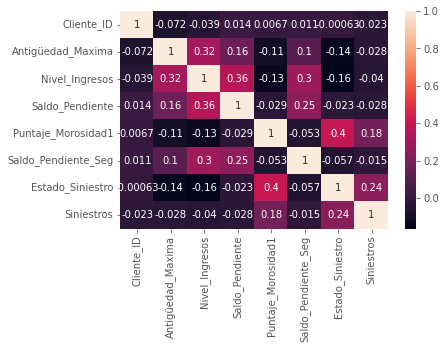

In [ ]:
# Graficamos correlación de las variables independientes
correlacion = data_Seguros.corr()
sns.heatmap(correlacion, annot = True)
plt.show()

No hay una correlacion alta entre las variables, lo que nos esta diciendo es que entre ellas no se explican mutuamente y no hay necesidad de eliminar alguna de ellas.

## Analisis Cluster

In [ ]:
# Estandarización de las variables
# ==============================================================================
datos_scaled = scale(X=data_Seguros_cuantita, axis=0, with_mean=True, with_std=True)
datos_scaled = pd.DataFrame(datos_scaled, columns=data_Seguros_cuantita.columns, index=data_Seguros_cuantita.index)
datos_scaled.head(4)

,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Estado_Siniestro,Siniestros
0,-0.094595,-0.428137,-0.225784,-0.582394,-0.137667
1,0.685659,-0.362953,-0.225784,-0.582394,-0.137667
2,1.198397,-0.477775,-0.225784,-0.582394,-0.137667
3,-0.317525,-0.421587,-0.225784,-0.582394,-0.137667


In [ ]:
# Cálculo de distancias

print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.head(8)

------------------
Distancia euclídea
------------------


,0,1,2,3,4,5,6,7,8,9,...,5790,5791,5792,5793,5794,5795,5796,5797,5798,5799
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.782972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.293945,0.525438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.223026,1.004896,1.516963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.450405,0.680931,0.156607,1.673412,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.100227,2.324104,1.806340,3.323253,1.650025,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.892434,2.112971,1.645695,3.111587,1.503193,0.620086,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.410877,2.306592,2.373938,2.486154,2.416745,3.315185,3.188562,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Top n registros más similares

distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(10)

,estado_a,estado_b,distancia
28930214,5614,4987,0.0
28489428,5628,4911,0.0
29799951,5351,5137,0.0
32566875,5675,5614,0.0
28488713,4913,4911,0.0
30861666,5666,5320,0.0
28599656,5656,4930,0.0
29446580,5780,5076,0.0
28854630,5430,4974,0.0
31662097,5697,5458,0.0


Numero de clusters

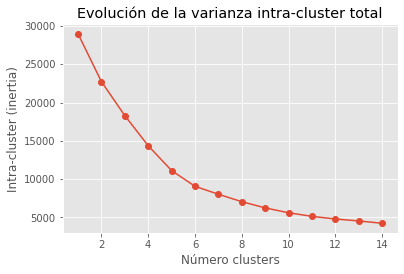

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,
                        random_state = 123
                    )
    modelo_kmeans.fit(datos_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

Optamos por 4 clusters

In [ ]:
# Clasificación con el modelo kmeans

y_predict = modelo_kmeans.predict(X=datos_scaled)

In [ ]:
kmeans = KMeans(n_clusters=4).fit(datos_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

[[-2.71880399e-01 -1.18990599e-01 -1.93758102e-01  1.71705100e+00
   3.65737374e-01]
 [ 5.28453487e-02 -1.04342409e-01 -1.51622430e-01 -5.82393885e-01
  -1.37667095e-01]
 [-3.17524948e-01 -5.26373664e-01 -2.25783627e-01  1.71705100e+00
   6.31424829e+01]
 [ 6.39098557e-01  2.20777645e+00  3.31635741e+00 -2.76932572e-01
  -8.48486377e-02]]


In [ ]:
kmeans.n_clusters


4

In [ ]:
# El cluster en nuestro DataFrame
cluster = kmeans.predict(datos_scaled)
cluster

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
data_Seguros_cuantita['cluster'] = cluster
data_Seguros_cuantita.head()

,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Estado_Siniestro,Siniestros,cluster
0,44.0,604.86,0.0,0.0,0.0,1
1,79.0,1006.21,0.0,0.0,0.0,1
2,102.0,299.23,0.0,0.0,0.0,1
3,34.0,645.19,0.0,0.0,0.0,1
4,109.0,218.00,0.0,0.0,0.0,1


In [ ]:
# Tabla de frecuencia del Cluster
cluster_count = (data_Seguros_cuantita
                       .groupby("cluster")
                       .agg(frequency=("cluster", "count")))

cluster_count["Acumulado"] = cluster_count["frequency"].cumsum()
cluster_count

,frequency,Acumulado
cluster,,
0,1432,1432
1,4096,5528
2,1,5529
3,271,5800


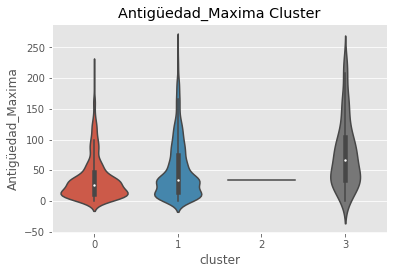

In [ ]:
# Gráfico: peso_kg
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'cluster',
        y     = 'Antigüedad_Maxima',
        data  = data_Seguros_cuantita,
        #color = "white",
        ax    = ax
    )

ax.set_title('Antigüedad_Maxima Cluster');

El cluster  N°2 no tiene alta frecuencia podria agrupar con otro conjunto.

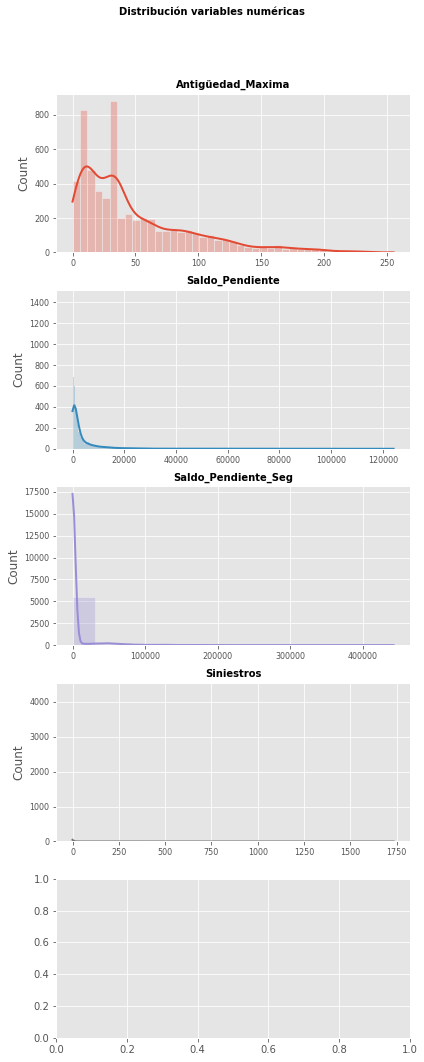

In [ ]:
# Gráfico de distribución para las  variable numérica

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 15))
axes = axes.flat
columnas_numeric = data_Seguros_finalD.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data_Seguros_finalD,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Podemos observar que no tienen una distribucion normaal ninguna de las variables cuantitativas

In [ ]:
#Eliminamos del DataFrame data_Seguros_finalD la varaible ESTADO_SINIESTRO
data_Seguros_finalD=data_Seguros_finalD.drop(['Estado_Siniestro'],axis=1)

In [ ]:
print(data_Seguros_finalD)

      Antigüedad_Maxima  Saldo_Pendiente  Saldo_Pendiente_Seg  Siniestros  \
0                  44.0           604.86                  0.0         0.0   
1                  79.0          1006.21                  0.0         0.0   
2                 102.0           299.23                  0.0         0.0   
3                  34.0           645.19                  0.0         0.0   
4                 109.0           218.00                  0.0         0.0   
...                 ...              ...                  ...         ...   
5795               13.0             0.00                  0.0         0.0   
5796                2.0          2196.94                  0.0         0.0   
5797                4.0           805.72                  0.0         0.0   
5798                0.0             0.01                  0.0         0.0   
5799                4.0          1261.59                  0.0         0.0   

      Nivel_Ingresos_0.0  Nivel_Ingresos_1.0  Nivel_Ingresos_2.0  \
0      

In [ ]:
# Convertimos a dummy la variable Estado_Siniestro(variable dicotomica)
Estado_Siniestro = pd.get_dummies(data_Seguros_final.Estado_Siniestro, prefix='Estado_Siniestro')
Estado_Siniestro = Estado_Siniestro.drop(['Estado_Siniestro_1.0'], axis=1)
Estado_Siniestro.columns = ['Estado_Siniestro']
print(len(Estado_Siniestro))


5800


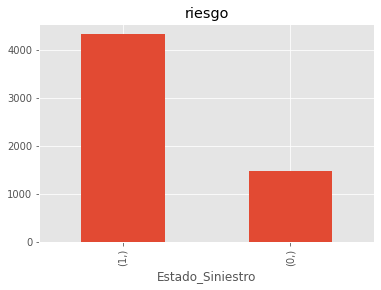

In [ ]:
#Graficamos la varaible Estado_Siniestro
d1 = Estado_Siniestro.value_counts()
d1.plot(kind='bar', title='riesgo')

In [ ]:
# Unimos las variables cualitativas
data_Seguros_finalRL = pd.merge(data_Seguros_finalD, Estado_Siniestro, left_index=True, right_index=True)
data_Seguros_finalRL.head()

,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Siniestros,Nivel_Ingresos_0.0,Nivel_Ingresos_1.0,Nivel_Ingresos_2.0,Nivel_Ingresos_3.0,Nivel_Ingresos_4.0,Nivel_Ingresos_5.0,Puntaje_Morosidad1_0.0,Puntaje_Morosidad1_1.0,Puntaje_Morosidad1_2.0,Puntaje_Morosidad1_3.0,Puntaje_Morosidad1_4.0,Puntaje_Morosidad1_5.0,Puntaje_Morosidad1_6.0,Estado_Siniestro
0,44.0,604.86,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,79.0,1006.21,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,102.0,299.23,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,34.0,645.19,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,109.0,218.00,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Contamos las variables 0 y 1 de Estado_Siniestro
data_Seguros_finalRL.Estado_Siniestro.value_counts().sort_index()

0    1469
1    4331
Name: Estado_Siniestro, dtype: int64

In [ ]:
print(data_Seguros_finalRL.head())

   Antigüedad_Maxima  Saldo_Pendiente  Saldo_Pendiente_Seg  Siniestros  \
0               44.0           604.86                  0.0         0.0   
1               79.0          1006.21                  0.0         0.0   
2              102.0           299.23                  0.0         0.0   
3               34.0           645.19                  0.0         0.0   
4              109.0           218.00                  0.0         0.0   

   Nivel_Ingresos_0.0  Nivel_Ingresos_1.0  Nivel_Ingresos_2.0  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   0                   1                   0   

   Nivel_Ingresos_3.0  Nivel_Ingresos_4.0  Nivel_Ingresos_5.0  \
0                   0                   0                   0   
1                   0             

## Modelado

Graficamos las variables cuantitativas

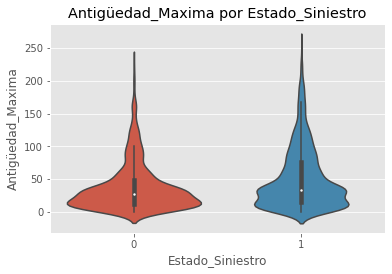

In [ ]:
# Gráfico: Antigüedad_Maxima
fig, ax = plt.subplots(figsize=(6, 3.84))
sns.violinplot(
        x     = 'Estado_Siniestro', # Variable dicotomica
        y     = 'Antigüedad_Maxima', # Variable cuantitativa
        data  = data_Seguros_finalRL,
        #color = "white",
        ax    = ax
    )

ax.set_title('Antigüedad_Maxima por Estado_Siniestro');

In [ ]:
# T-test diferencias

res_ttest = ttest_ind(
                x1 = data_Seguros_finalD[data_Seguros_finalRL['Estado_Siniestro'] ==0]['Antigüedad_Maxima'],
                x2 = data_Seguros_finalD[data_Seguros_finalRL['Estado_Siniestro'] ==1]['Antigüedad_Maxima'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=-10.773, p-value=0.000


Existe diferencia entre las 2 muestras

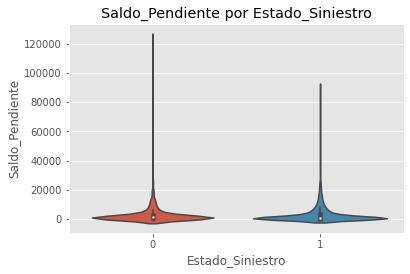

In [ ]:
# Gráfico: Saldo_Pendiente

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Estado_Siniestro', # Variable dicotomica
        y     = 'Saldo_Pendiente', # Variable cuantitativa
        data  = data_Seguros_finalRL,
        #color = "white",
        ax    = ax
    )

ax.set_title('Saldo_Pendiente por Estado_Siniestro');

In [ ]:
# T-test diferencias

res_ttest = ttest_ind(
                x1 = data_Seguros_finalD[data_Seguros_finalRL['Estado_Siniestro'] ==0]['Saldo_Pendiente'],
                x2 = data_Seguros_finalD[data_Seguros_finalRL['Estado_Siniestro'] ==1]['Saldo_Pendiente'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=-1.735, p-value=0.083


Las dos muestras no tienen diferencias en sus medias(no podemos trabajar con esta variable)

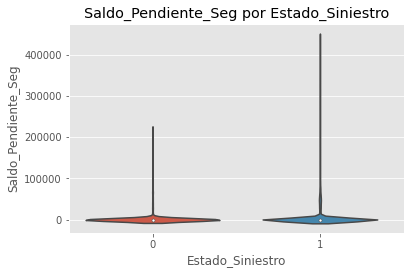

In [ ]:
# Gráfico: Saldo_Pendiente_Seg

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Estado_Siniestro', # Variable dicotomica
        y     = 'Saldo_Pendiente_Seg', # Variable cuantitativa
        data  = data_Seguros_finalRL,
        #color = "white",
        ax    = ax
    )

ax.set_title('Saldo_Pendiente_Seg por Estado_Siniestro');

In [ ]:
# T-test diferencias

res_ttest = ttest_ind(
                x1 = data_Seguros_finalD[data_Seguros_finalRL['Estado_Siniestro'] ==0]['Saldo_Pendiente_Seg'],
                x2 = data_Seguros_finalD[data_Seguros_finalRL['Estado_Siniestro'] ==1]['Saldo_Pendiente_Seg'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=-4.355, p-value=0.000


Existe diferencia entre las 2 muestras

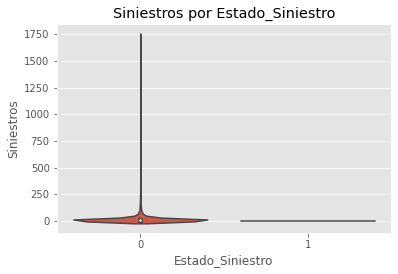

In [ ]:
# Gráfico: Siniestros

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Estado_Siniestro', # Variable dicotomica
        y     = 'Siniestros', # Variable cuantitativa
        data  = data_Seguros_finalRL,
        #color = "white",
        ax    = ax
    )

ax.set_title('Siniestros por Estado_Siniestro');

In [ ]:
# T-test diferencias

res_ttest = ttest_ind(
                x1 = data_Seguros_finalD[data_Seguros_finalRL['Estado_Siniestro'] ==0]['Siniestros'],
                x2 = data_Seguros_finalD[data_Seguros_finalRL['Estado_Siniestro'] ==1]['Siniestros'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=18.524, p-value=0.000


Existe diferencia entre las 2 muestras

# Ubicando  las variables

In [ ]:
X_data = data_Seguros_finalRL.drop(columns = ['Estado_Siniestro',	'Siniestros','Saldo_Pendiente'])
Y_data = data_Seguros_finalRL['Estado_Siniestro']

print(X_data.head())
print(Y_data.head())

   Antigüedad_Maxima  Saldo_Pendiente_Seg  Nivel_Ingresos_0.0  \
0               44.0                  0.0                   0   
1               79.0                  0.0                   0   
2              102.0                  0.0                   0   
3               34.0                  0.0                   0   
4              109.0                  0.0                   0   

   Nivel_Ingresos_1.0  Nivel_Ingresos_2.0  Nivel_Ingresos_3.0  \
0                   1                   0                   0   
1                   1                   0                   0   
2                   1                   0                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   Nivel_Ingresos_4.0  Nivel_Ingresos_5.0  Puntaje_Morosidad1_0.0  \
0                   0                   0                       1   
1                   0                   0                       1   
2          

In [ ]:
#Seleccionado la data para entrenamiento train(70%) y test(30%)
X_data_train,X_data_test,Y_data_train,Y_data_test=train_test_split(X_data,Y_data,test_size=0.3,random_state=0)


In [ ]:
# instanciamos el modelo
log_regresion=LogisticRegression()


In [ ]:
#ajustar el modelo usando training
log_regresion.fit(X_data_train,Y_data_train)

LogisticRegression()

## Usando el modelo para hacer predicciones del testing

In [ ]:
y_pred=log_regresion.predict(X_data_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

## Diagnostico del modelo

In [ ]:
cnf_matrix=metrics.confusion_matrix(Y_data_test,y_pred)
cnf_matrix

array([[   0,  421],
       [   0, 1319]])

Podemos observar que el modelo se ha equivocado en predecir los que no tuvieron siniestros.


In [ ]:
print("Accuracy: ",metrics.accuracy_score(Y_data_test,y_pred))

Accuracy:  0.7580459770114942


Aproximadamente el 75.8% es pronosticada por las variables